In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("final_hateXplain.csv")
df.head()

,comment,label,Race,Religion,Gender,Sexual Orientation,Miscellaneous
0,0 u0 lmao wow fuck you too 😂 😂,normal,No_race,Nonreligious,No_gender,No_orientation,NaN
1,1 0 th floor maybe wow cnn with the fakenews t...,offensive,No_race,Nonreligious,No_gender,No_orientation,Other
2,1 0 yrs <number> white women raped by niggers ...,hatespeech,African,Nonreligious,No_gender,No_orientation,NaN
3,1 2 h ago ching chong accepted your friend req...,offensive,Asian,Nonreligious,No_gender,No_orientation,NaN
4,1 8 th century mayhem and lawlessness had noth...,normal,No_race,Nonreligious,No_gender,No_orientation,NaN


In [3]:
df = df.drop(['Race','Religion','Gender','Sexual Orientation','Miscellaneous'],axis='columns')
df.head()

,comment,label
0,0 u0 lmao wow fuck you too 😂 😂,normal
1,1 0 th floor maybe wow cnn with the fakenews t...,offensive
2,1 0 yrs <number> white women raped by niggers ...,hatespeech
3,1 2 h ago ching chong accepted your friend req...,offensive
4,1 8 th century mayhem and lawlessness had noth...,normal


In [4]:
df['label'].value_counts()

label
normal        7818
hatespeech    6484
offensive     5807
Name: count, dtype: int64

In [5]:
df.shape

(20109, 2)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['label'] = encoder.fit_transform(df['label'])

In [8]:
df.head()

,comment,label
0,0 u0 lmao wow fuck you too 😂 😂,1
1,1 0 th floor maybe wow cnn with the fakenews t...,2
2,1 0 yrs <number> white women raped by niggers ...,0
3,1 2 h ago ching chong accepted your friend req...,2
4,1 8 th century mayhem and lawlessness had noth...,1


In [9]:
df.isnull().sum()

comment    0
label      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,comment,label
0,0 u0 lmao wow fuck you too 😂 😂,1
1,1 0 th floor maybe wow cnn with the fakenews t...,2
2,1 0 yrs <number> white women raped by niggers ...,0
3,1 2 h ago ching chong accepted your friend req...,2
4,1 8 th century mayhem and lawlessness had noth...,1


In [12]:
df['label'].value_counts()

label
1    7818
0    6484
2    5807
Name: count, dtype: int64

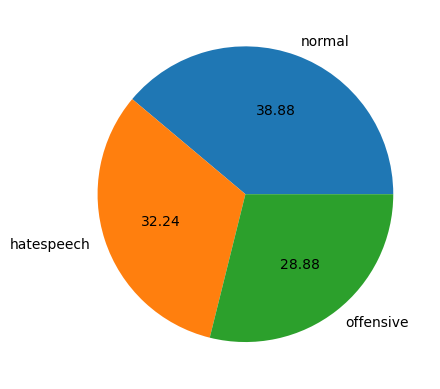

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['normal','hatespeech','offensive'],autopct="%0.2f")
plt.show()

In [14]:
import nltk
from nltk.corpus import stopwords
import string

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/piyushsaini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_chars'] = df['comment'].apply(len)

In [17]:
df.head()

,comment,label,num_chars
0,0 u0 lmao wow fuck you too 😂 😂,1,30
1,1 0 th floor maybe wow cnn with the fakenews t...,2,214
2,1 0 yrs <number> white women raped by niggers ...,0,120
3,1 2 h ago ching chong accepted your friend req...,2,53
4,1 8 th century mayhem and lawlessness had noth...,1,276


In [18]:
df['num_words'] =  df['comment'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df.head()

,comment,label,num_chars,num_words
0,0 u0 lmao wow fuck you too 😂 😂,1,30,9
1,1 0 th floor maybe wow cnn with the fakenews t...,2,214,49
2,1 0 yrs <number> white women raped by niggers ...,0,120,27
3,1 2 h ago ching chong accepted your friend req...,2,53,11
4,1 8 th century mayhem and lawlessness had noth...,1,276,47


In [20]:
df['num_sentence'] = df['comment'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,comment,label,num_chars,num_words,num_sentence
0,0 u0 lmao wow fuck you too 😂 😂,1,30,9,1
1,1 0 th floor maybe wow cnn with the fakenews t...,2,214,49,1
2,1 0 yrs <number> white women raped by niggers ...,0,120,27,1
3,1 2 h ago ching chong accepted your friend req...,2,53,11,1
4,1 8 th century mayhem and lawlessness had noth...,1,276,47,1


In [22]:
df[['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,20109.000000,20109.000000,20109.000000
mean,127.406833,24.725496,1.001293
std,78.101560,14.256336,0.037294
min,8.000000,2.000000,1.000000
25%,63.000000,13.000000,1.000000
50%,109.000000,22.000000,1.000000
75%,185.000000,35.000000,1.000000
max,526.000000,165.000000,3.000000


In [23]:
df[df['label'] == 1][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,7818.000000,7818.000000,7818.000000
mean,126.203249,25.009465,1.001023
std,78.084566,14.467050,0.031974
min,10.000000,3.000000,1.000000
25%,62.000000,13.000000,1.000000
50%,107.000000,22.000000,1.000000
75%,183.750000,36.000000,1.000000
max,376.000000,92.000000,2.000000


In [24]:
df[df['label'] == 0][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,6484.000000,6484.000000,6484.000000
mean,134.712677,25.569247,1.002005
std,78.921474,14.442736,0.048060
min,8.000000,2.000000,1.000000
25%,68.000000,14.000000,1.000000
50%,121.000000,23.000000,1.000000
75%,196.000000,37.000000,1.000000
max,526.000000,165.000000,3.000000


In [25]:
df[df['label'] == 2][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,5807.000000,5807.000000,5807.000000
mean,120.869640,23.401068,1.000861
std,76.534109,13.657710,0.029333
min,9.000000,2.000000,1.000000
25%,58.000000,12.000000,1.000000
50%,102.000000,20.000000,1.000000
75%,174.000000,33.000000,1.000000
max,354.000000,76.000000,2.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

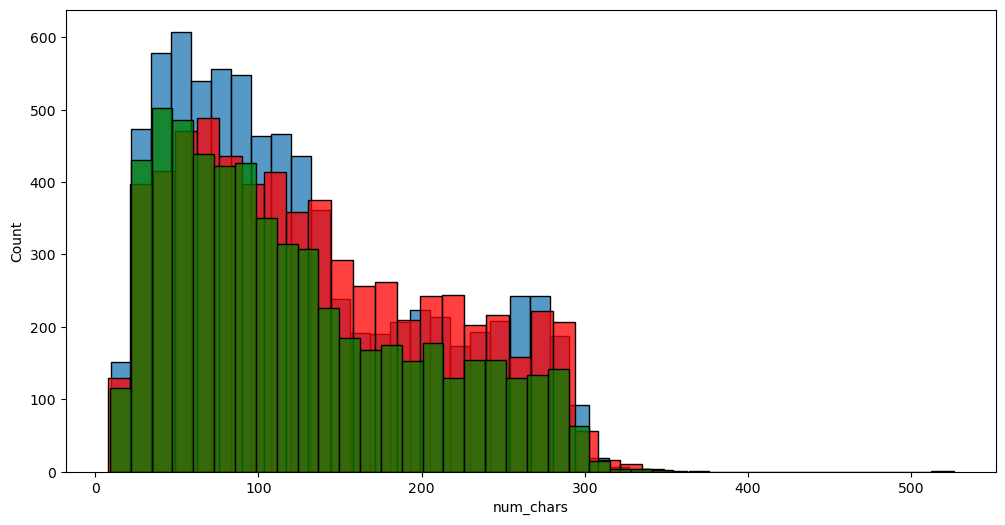

In [27]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 1]['num_chars'])
sns.histplot(df[df['label'] == 0]['num_chars'],color='red')
sns.histplot(df[df['label'] == 2]['num_chars'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

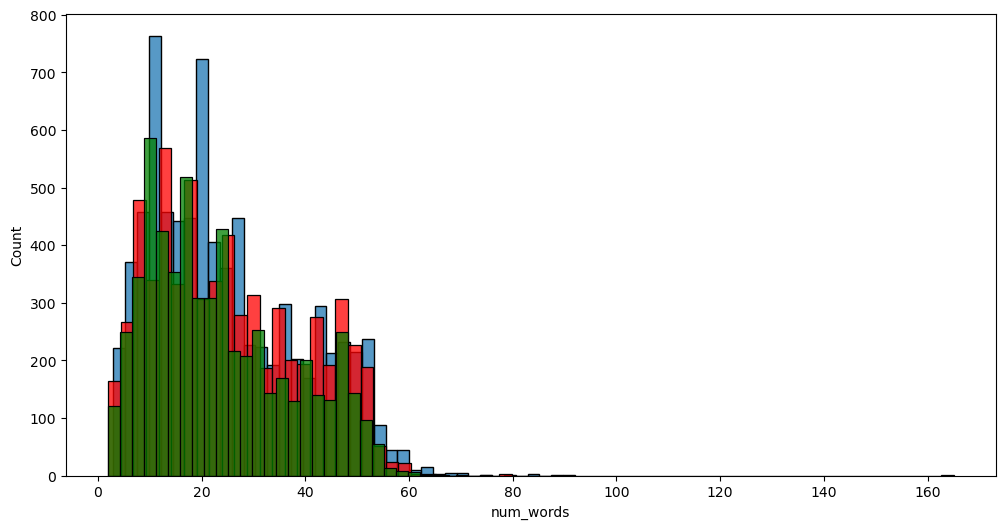

In [28]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 1]['num_words'])
sns.histplot(df[df['label'] == 0]['num_words'],color='red')
sns.histplot(df[df['label'] == 2]['num_words'],color='green')

<Axes: xlabel='num_sentence', ylabel='Count'>

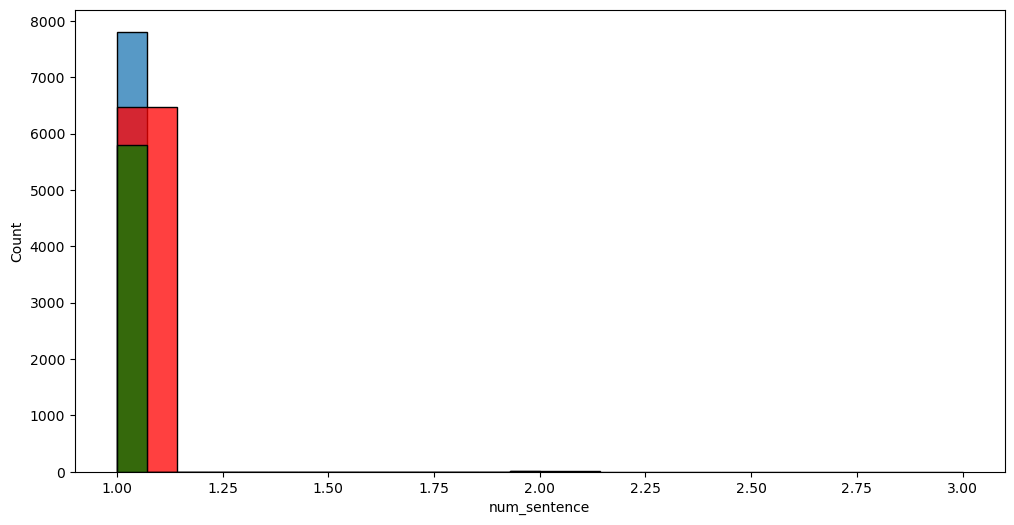

In [29]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 1]['num_sentence'])
sns.histplot(df[df['label'] == 0]['num_sentence'],color='red')
sns.histplot(df[df['label'] == 2]['num_sentence'],color='green')

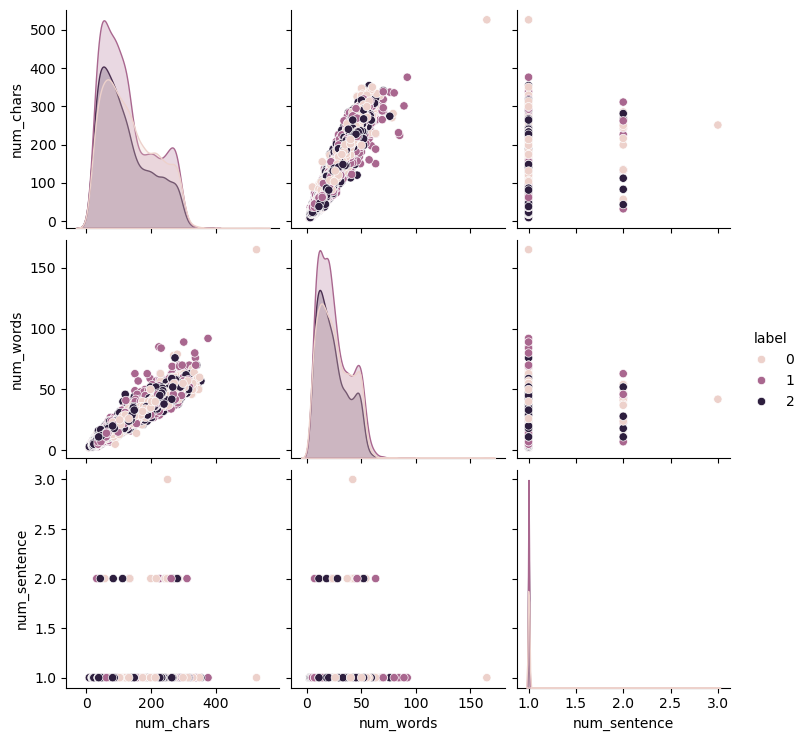

In [30]:
sns.pairplot(df,hue='label')

In [31]:
# sns.heatmap(df.corr(),cannot=True)

In [32]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [33]:
def transform_comment(comment):
    comment = comment.lower()
    comment = nltk.word_tokenize(comment)

    y=[]
    for i in comment:
        if i.isalnum():
            y.append(i)

    comment = y[:]
    y.clear()

    for i in comment:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    comment = y[:]
    y.clear()

    for i in comment:
        y.append(ps.stem(i))
         
    return " ".join(y)

In [34]:
transform_comment('1 0 th floor maybe wow cnn with the fakenews the body count is going to be waay bad too but we can all go home now they have the white ar <number> toting suicide shooter with huge drum mags dead on the 3 2 nd floor')

'1 0 th floor mayb wow cnn fakenew bodi count go waay bad go home white ar number tote suicid shooter huge drum mag dead 3 2 nd floor'

In [35]:
df['comment'][1]

'1 0 th floor maybe wow cnn with the fakenews the body count is going to be waay bad too but we can all go home now they have the white ar <number> toting suicide shooter with huge drum mags dead on the 3 2 nd floor'

In [36]:
df['transform_comment'] = df['comment'].apply(transform_comment)

In [37]:
df.head()

,comment,label,num_chars,num_words,num_sentence,transform_comment
0,0 u0 lmao wow fuck you too 😂 😂,1,30,9,1,0 u0 lmao wow fuck
1,1 0 th floor maybe wow cnn with the fakenews t...,2,214,49,1,1 0 th floor mayb wow cnn fakenew bodi count g...
2,1 0 yrs <number> white women raped by niggers ...,0,120,27,1,1 0 yr number white women rape nigger number n...
3,1 2 h ago ching chong accepted your friend req...,2,53,11,1,1 2 h ago ching chong accept friend request
4,1 8 th century mayhem and lawlessness had noth...,1,276,47,1,1 8 th centuri mayhem lawless noth loud mouth ...


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
normal_wc = wc.generate(df[df['label'] == 1]['transform_comment'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(normal_wc)

NameError: name 'normal_wc' is not defined

<Figure size 1500x600 with 0 Axes>

In [ ]:
hatespeech_wc = wc.generate(df[df['label'] == 0]['transform_comment'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(hatespeech_wc)

In [ ]:
offensive_wc = wc.generate(df[df['label'] == 0]['transform_comment'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(offensive_wc)

In [ ]:
df.head()

In [ ]:
normal_corpus = []
for msg in df[df['label']==1]['transform_comment'].tolist():
    for word in msg.split():
       normal_corpus.append(word)

In [ ]:
len(normal_corpus)

In [ ]:
import seaborn as sns

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
hatespeech_corpus = []
for msg in df[df['label']==0]['transform_comment'].tolist():
    for word in msg.split():
       hatespeech_corpus.append(word)

In [ ]:
len(hatespeech_corpus)

from collections import Counter
sns.barplot(pd.DataFrame(Counter(hatespeech_corpus).most_common(30))[0],pd.DataFrame(Counter(hatespeech_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
offensive_corpus = []
for msg in df[df['label']==2]['transform_comment'].tolist():
    for word in msg.split():
      offensive_corpus.append(word) 

In [ ]:
len(offensive_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(offensive_corpus).most_common(30))[0],pd.DataFrame(Counter(offensive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transform_comment']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

X.shape

In [ ]:
y = df['label'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,  MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
df.label.value_counts()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='macro'))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='macro'))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='macro'))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))